# Data Cleaning: Airbnb Listings

In [21]:
#Import the basic libraries.
import pandas as pd
import numpy as np

#Viz
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

#Calculation
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [22]:
cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

data = pd.read_csv('./listings.csv', usecols=cols)

In [23]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$160.00,3,21,62,86.0,1
1,1846722,2631556,NaN,Apartment,Entire home/apt,10,1.0,3.0,3.0,Real Bed,$105.00,1,28,22,85.0,2
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,$58.00,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$185.00,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,$195.00,1,30,1,100.0,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27392 entries, 0 to 27391
Data columns (total 16 columns):
id                      27392 non-null int64
host_id                 27392 non-null int64
zipcode                 27230 non-null object
property_type           27386 non-null object
room_type               27392 non-null object
accommodates            27392 non-null int64
bathrooms               26929 non-null float64
bedrooms                27252 non-null float64
beds                    27294 non-null float64
bed_type                27392 non-null object
price                   27392 non-null object
minimum_nights          27392 non-null int64
availability_30         27392 non-null int64
number_of_reviews       27392 non-null int64
review_scores_rating    18735 non-null float64
host_listing_count      27392 non-null int64
dtypes: float64(4), int64(7), object(5)
memory usage: 3.3+ MB


In [25]:
len(data['zipcode'][data.zipcode.isnull()])

162

In [26]:
# check the number of missing values in each individual column
for col in data.columns:
    print (col + '    >>>    Number of Missing Values:', len(data[col][data[col].isnull()]))

id    >>>    Number of Missing Values: 0
host_id    >>>    Number of Missing Values: 0
zipcode    >>>    Number of Missing Values: 162
property_type    >>>    Number of Missing Values: 6
room_type    >>>    Number of Missing Values: 0
accommodates    >>>    Number of Missing Values: 0
bathrooms    >>>    Number of Missing Values: 463
bedrooms    >>>    Number of Missing Values: 140
beds    >>>    Number of Missing Values: 98
bed_type    >>>    Number of Missing Values: 0
price    >>>    Number of Missing Values: 0
minimum_nights    >>>    Number of Missing Values: 0
availability_30    >>>    Number of Missing Values: 0
number_of_reviews    >>>    Number of Missing Values: 0
review_scores_rating    >>>    Number of Missing Values: 8657
host_listing_count    >>>    Number of Missing Values: 0


### 1. Remove NaN values from dataframe except review_scores_rating

In [27]:
original = len(data)
data = data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
print('Number of NaN values removed:', original - len(data))

Number of NaN values removed: 769


### 2. Convert formatting for price from $1.00 into a float of 1.00

In [28]:
data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

### 3. Drop any invalid values

In [29]:
data.describe()

,id,host_id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
count,2.662300e+04,2.662300e+04,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,18134.000000,26623.000000
mean,2.686460e+06,8.653081e+06,2.900762,1.116873,1.135597,1.535026,171.517034,2.556849,15.949254,9.947752,92.231223,1.785486
std,1.543614e+06,7.524285e+06,1.757325,0.370915,0.670277,1.104506,225.318606,2.578784,12.531748,18.429119,8.352263,2.249883
min,1.050000e+02,2.830000e+02,1.000000,0.000000,0.000000,1.000000,10.000000,1.000000,0.000000,0.000000,20.000000,1.000000
25%,1.255093e+06,2.206506e+06,2.000000,1.000000,1.000000,1.000000,85.000000,1.000000,1.000000,0.000000,89.000000,1.000000
50%,2.791446e+06,6.327918e+06,2.000000,1.000000,1.000000,1.000000,130.000000,2.000000,18.000000,3.000000,94.000000,1.000000
75%,4.161726e+06,1.417487e+07,4.000000,1.000000,1.000000,2.000000,199.000000,3.000000,29.000000,11.000000,99.000000,2.000000
max,4.941812e+06,2.546867e+07,16.000000,8.000000,10.000000,16.000000,8000.000000,30.000000,30.000000,221.000000,100.000000,28.000000


可以看出，bedrooms中有最小值0。这是不寻常的。我们可以查看有多少个bedroom为0的值：

In [39]:
print ('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print ('Number of Beds 0:', len(data[data['beds'] == 0]))
print ('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

Number of Accommodates 0: 0
Number of Bedrooms 0: 2321
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


其中，有2321间房是没有卧室但是带有床，因此，我们查看一下这些房源的情况

In [42]:
data[data['bedrooms']==0]

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
29,2993952,2731014,10013,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,195.0,1,0,1,100.0,1
34,4594464,23815697,10016,Apartment,Entire home/apt,2,1.0,0.0,1.0,Couch,150.0,1,3,0,NaN,1
56,4329251,22478704,11211,Loft,Entire home/apt,4,1.0,0.0,2.0,Real Bed,149.0,3,0,2,100.0,1
67,2289259,11693793,10023,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,250.0,1,0,0,NaN,1
86,4516565,9396478,10028,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,150.0,1,3,0,NaN,1
110,2694583,5592626,11206,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,85.0,2,12,3,90.0,1
133,52294,241678,10002,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,155.0,5,29,70,94.0,1
136,2932141,4519429,10019,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,199.0,1,0,3,93.0,1
143,1644146,1338262,11201,Apartment,Entire home/apt,3,1.0,0.0,1.0,Real Bed,150.0,3,30,35,91.0,1
165,1906454,9889178,10016,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,175.0,7,30,0,NaN,1


In [43]:
data['bed_type'].unique()

array(['Real Bed', 'Couch', 'Futon', 'Airbed', 'Pull-out Sofa'],
      dtype=object)

我们可以发现：这些房源中，没有卧室是因为部分房源提供的是沙发或气垫床，也有可能是卧室和客厅一体的房源，所以这些值是可以保留的。

### 4. Convert Zipcode to 5 digits

部分邮政编码超于5位数，形如xxxx-xxx。因此我们通过正则表达式查找出符合相关规则的字段，进行一致化处理，保留5位邮政编码。

In [44]:
data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '')

In [45]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,96.0,2


### 5.  Let's explore distribution of accommodates

In [12]:
print('Number of Unique Accomodation: ', np.unique(data['accommodates']))
for i in range(1, 17):
    print('Accommodation {}:'.format(i), len(data[data['accommodates'] == i]))

Number of Unique Accomodation:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Accommodation 1: 2643
Accommodation 2: 11400
Accommodation 3: 2909
Accommodation 4: 4278
Accommodation 5: 982
Accommodation 6: 1214
Accommodation 7: 217
Accommodation 8: 333
Accommodation 9: 57
Accommodation 10: 119
Accommodation 11: 15
Accommodation 12: 43
Accommodation 13: 4
Accommodation 14: 14
Accommodation 15: 5
Accommodation 16: 69


In [13]:
data.groupby('accommodates').agg('count')['id']

accommodates
1      2643
2     11400
3      2909
4      4278
5       982
6      1214
7       217
8       333
9        57
10      119
11       15
12       43
13        4
14       14
15        5
16       69
Name: id, dtype: int64

### 6. Visualize distribution of price, accommdations, beds, and review_scores_rating respectively

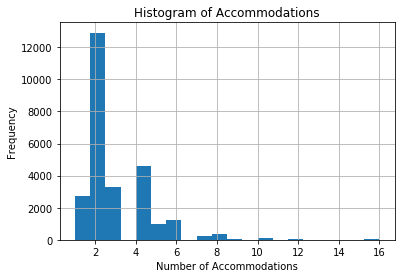

In [47]:
plt.hist(data['accommodates'], bins=20)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [16]:
# explore distribution of beds

print('Number of Unique Beds: ', np.unique(data['beds']))
for i in range(1, 17):
    print('Beds {}:'.format(i), len(data[data['beds'] == i]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16.]
Beds 1: 16002
Beds 2: 5418
Beds 3: 1770
Beds 4: 610
Beds 5: 243
Beds 6: 117
Beds 7: 41
Beds 8: 22
Beds 9: 3
Beds 10: 20
Beds 11: 4
Beds 12: 9
Beds 13: 1
Beds 14: 15
Beds 15: 0
Beds 16: 27


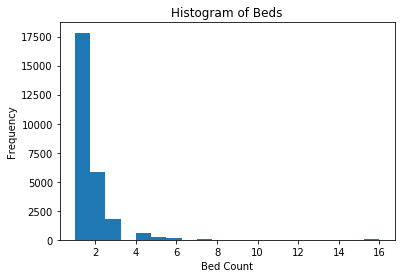

In [48]:
# Visualize the distribution of beds
plt.hist(data['beds'], bins=20)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

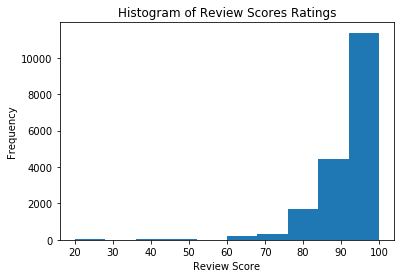

In [49]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

### 7. Convert NaN scores with 0 reviews into 'No Reviews'

In [50]:
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, 'review_scores_rating'] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace(np.nan, 'No Reviews')

In [51]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,86,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,98,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,96,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,100,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,96,2


In [53]:
# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]

In [55]:
len(data)

26341

In [56]:
# ensure all zipcodes are of length 5
data = data[data['zipcode'].map(len) == 5]

In [57]:
len(data)

26337

In [58]:
data = data[data['zipcode'].apply(len) == 5]

### 8. Convert review_scores_rating into different buckets

In [59]:
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

In [60]:
data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print('Unique Values in the Column:', np.unique(data['review_scores_rating']))

Unique Values in the Column: ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94'
 '95-100' 'No Reviews']


In [61]:
data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,85-89,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,95-100,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,95-100,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,95-100,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,95-100,2
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,80.0,1,29,0,No Reviews,1
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,120.0,2,5,0,No Reviews,1
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,1,30,14,95-100,4
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,40.0,4,0,10,90-94,4
11,4833061,24879430,11221,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,75.0,1,2,0,No Reviews,1


### 9. Encode categorical variables

In [62]:
property_dummies = pd.get_dummies(data['property_type'])
room_dummies = pd.get_dummies(data['room_type'])
bed_dummies = pd.get_dummies(data['bed_type'])

### 10. Replace the old columns with our new one-hot encoded ones

In [64]:
df = pd.concat((data.drop(['property_type', 'room_type', 'bed_type'], axis=1), \
     property_dummies.astype(int), room_dummies.astype(int), bed_dummies.astype(int)), \
     axis=1)

print('Number of Columns:', len(df.columns))

Number of Columns: 39


### 11. Move target predictor 'price' to the end of the dataframe

In [72]:
cols = list(df.columns.values)
idx = cols.index('price')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
df = df[rearrange_cols]

### 12. Convert non-categorical variables to floats and normalize

In [73]:
def normalize(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listing_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = normalize(df[col])

In [74]:
df.head()

,id,host_id,zipcode,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,price
0,1069266,5867023,10022,-0.513054,-0.314881,-0.202220,-0.483837,0.172096,0.403692,2.807651,...,0,1,0,0,0,0,0,0,1,160.0
2,2061725,4601412,11221,-0.513054,-0.314881,-0.202220,0.420358,0.172096,-0.953412,1.348624,...,0,0,1,0,0,0,0,0,1,58.0
3,44974,198425,10011,-0.513054,-0.314881,-0.202220,-0.483837,2.887093,-1.192900,0.862282,...,0,1,0,0,0,0,0,0,1,185.0
4,4701675,22590025,10011,-0.513054,-0.314881,-0.202220,0.420358,-0.603617,1.122158,-0.488669,...,0,1,0,0,0,0,0,0,1,195.0
5,68914,343302,11231,1.763950,-0.314881,1.290872,1.324553,-0.215761,-0.394604,0.321902,...,0,1,0,0,0,0,0,0,1,165.0


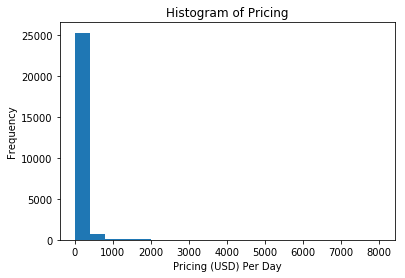

In [75]:
# visualize distribution of price (target variable)
plt.hist(df['price'], bins=20)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

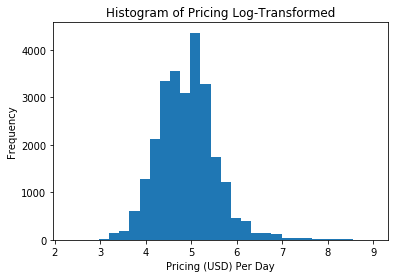

In [76]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

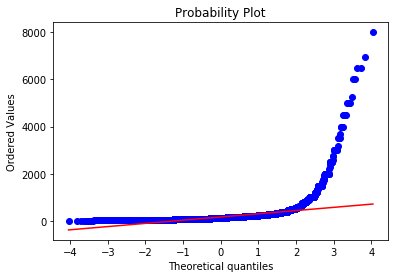

In [77]:
# qq plot for log-transformed pricing
stats.probplot(df['price'], dist="norm", plot=pylab)
pylab.show()

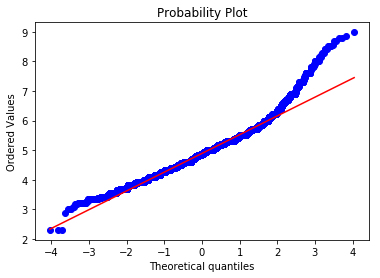

In [78]:
# qq plot for log-transformed pricing
stats.probplot(df['price_log'], dist="norm", plot=pylab)
pylab.show()

In [79]:
# read to csv
df.to_csv('output.csv')